In [1]:
from evaluation import Evaluator
from pprint import pprint

import sys
sys.path.append("../dataset")
sys.path.append("../models")
from data_loader import DataLoader, playtime_forever_edge_scoring_function, LinearNormalizer, GaussianNormalizer, PercentileNormalizer
from random_model import RandomModel
from common_neighbors_model import CommonNeighborsModel
from popularity_model import GamePopularityModel
from collaborative_filtering_model import CollaborativeFiltering


In [2]:
evaluator = Evaluator()

# data_loader = DataLoader()
# data_loader = DataLoader(edge_scoring_function = playtime_forever_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], score_normalizers = [GaussianNormalizer(1.0, 1.0)])
data_loader = DataLoader(edge_scoring_function = playtime_forever_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], score_normalizers = [GaussianNormalizer(1.0, 1.0)], game_embeddings = ['name', 'numReviews', 'avgReviewScore', 'price', 'genres', 'tags'])
# data_loader = DataLoader(edge_scoring_function = playtime_forever_edge_scoring_function, user_game_edge_embeddings = ['playtime_forever'], score_normalizers = [GaussianNormalizer(1.0, 1.0)], game_embeddings = ['name', 'genres'])
network = data_loader.get_full_network()
data_loader.load_stratified_user_train_test_network(network=network, train_percentage=0.9, test_percentage=0.1, seed=0)

random_model = RandomModel()
random_model.set_data_loader(data_loader)
random_model.train()

popularity_model = GamePopularityModel()
popularity_model.set_data_loader(data_loader)
popularity_model.train()

common_neighbors_model = CommonNeighborsModel()
common_neighbors_model.set_data_loader(data_loader)
common_neighbors_model.train()

collaborative_filtering_model = CollaborativeFiltering(num_epochs = 500, num_user_embedding = 500, num_game_embedding = 500, learning_rate = 1.0, regularization = 0.05, seed = 0)
collaborative_filtering_model.set_data_loader(data_loader)
collaborative_filtering_model.train(debug=True)


Total Learnable Parameters: 3918836
Known Game Embeddings:  ['num_reviews', 'avg_review_score', 'price', 'Genre: Software Training', 'Genre: Photo Editing', 'Genre: Sports', 'Genre: Audio Production', 'Genre: Education', 'Genre: Racing', 'Genre: Design & Illustration', 'Genre: Simulation', 'Genre: Early Access', 'Genre: Adventure', 'Genre: Massively Multiplayer', 'Genre: Animation & Modeling', 'Genre: Casual', 'Genre: Strategy', 'Genre: RPG', 'Genre: Free to Play', 'Genre: Action', 'Genre: Movie', 'Genre: Indie', 'Genre: Web Publishing', 'Genre: Utilities', 'Tag: Card Game', 'Tag: Motocross', 'Tag: Retro', 'Tag: Sokoban', 'Tag: Comic Book', 'Tag: Conversation', 'Tag: Coding', 'Tag: Assassin', 'Tag: Benchmark', 'Tag: Modern', 'Tag: Tile-Matching', 'Tag: Turn-Based Combat', 'Tag: Isometric', 'Tag: Precision Platformer', 'Tag: Choose Your Own Adventure', 'Tag: 1980s', 'Tag: Thriller', 'Tag: On-Rails Shooter', 'Tag: Trading', 'Tag: Great Soundtrack', 'Tag: Gore', 'Tag: Action RPG', 'Tag: C

 16%|█▌        | 79/500 [02:13<11:54,  1.70s/it]

In [ ]:
# Mean Abs Error 0.05 at 1000 epochs

random
{'auc_roc': 0.4975222536073993,
 'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'mean_positional_error': 1.2001644898104067,
 'roc_figure': <Figure size 640x480 with 1 Axes>,
 'top_10_hit_percentage': 0.0005920663114268798,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_based_auc_roc': 0.5108670882554409,
 'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}



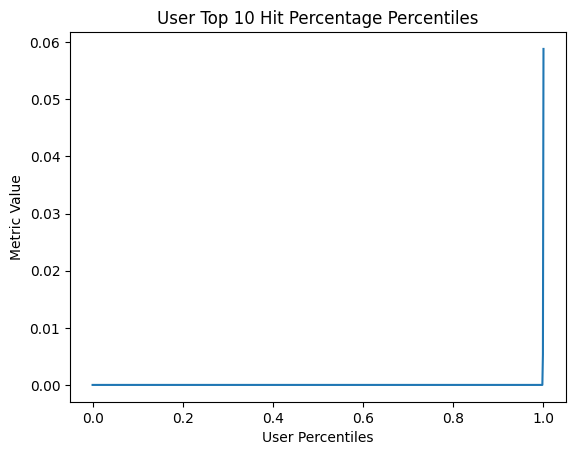

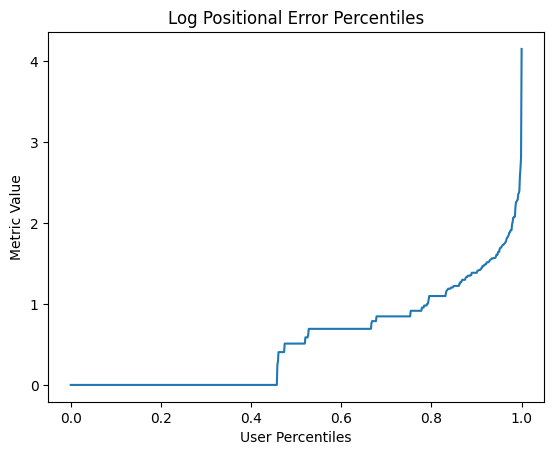

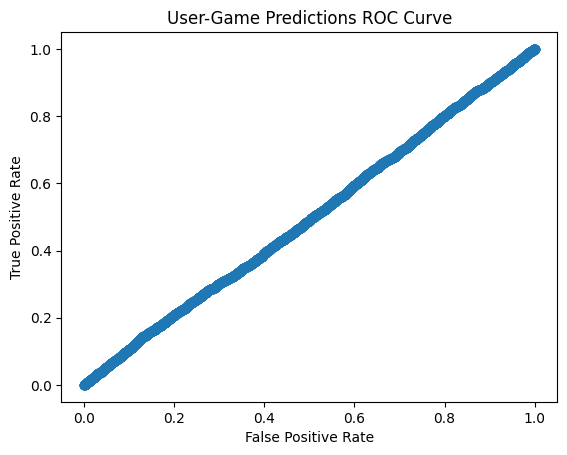

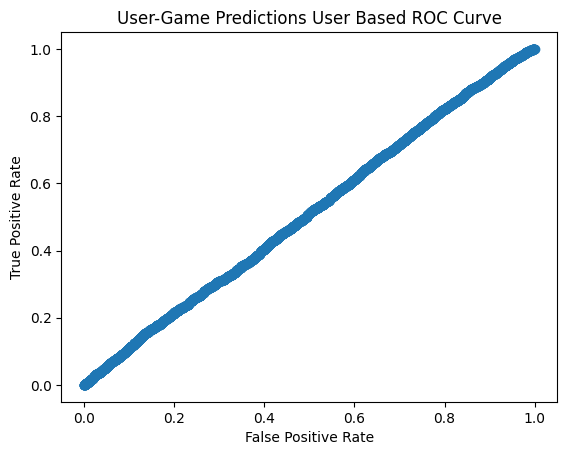

In [ ]:
evaluator.reset(random_model)
evaluator.plot_top_N_hit_percentage_percentiles(10)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_hit_percentage(10)
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(random_model.name())
pprint(evaluator.metrics)
print()

game_popularity
{'auc_roc': 0.8247246801103846,
 'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'mean_positional_error': 1.1662474623517265,
 'roc_figure': <Figure size 640x480 with 1 Axes>,
 'top_10_hit_percentage': 0.14328004736530492,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_based_auc_roc': 0.843464272074524,
 'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}



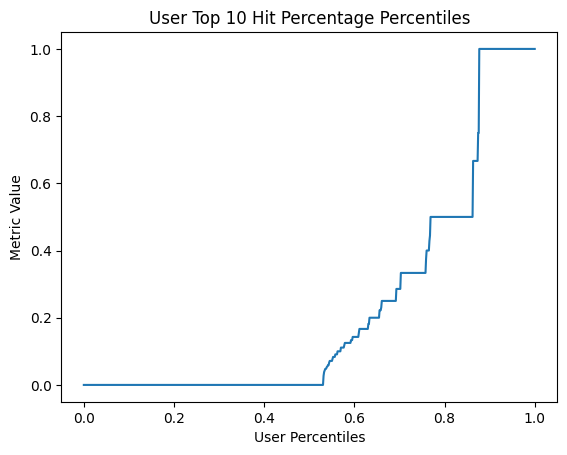

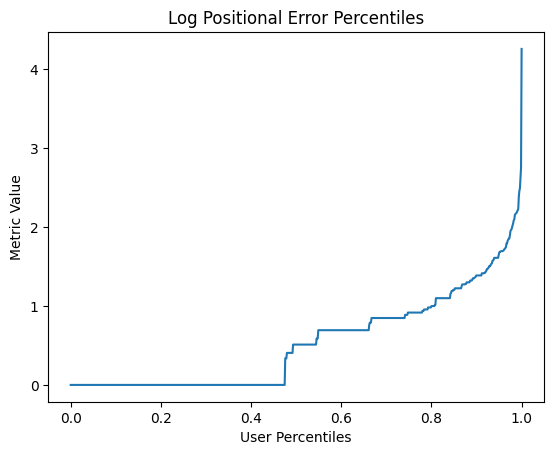

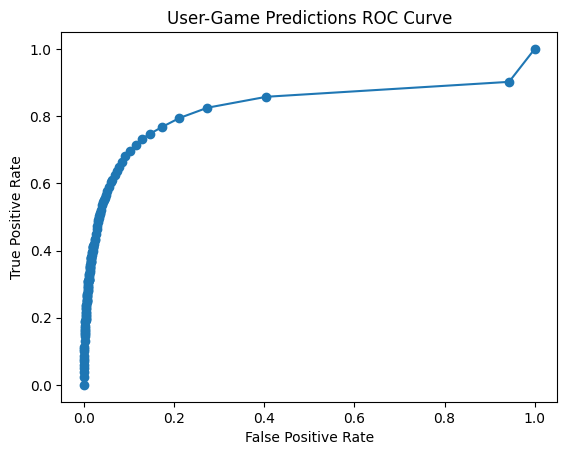

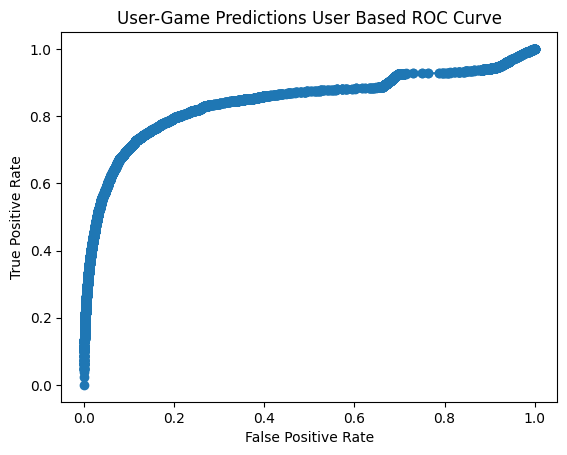

In [ ]:
evaluator.reset(popularity_model)
evaluator.plot_top_N_hit_percentage_percentiles(10)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_hit_percentage(10)
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(popularity_model.name())
pprint(evaluator.metrics)
print()

common_neighbors
{'auc_roc': 0.866715530959285,
 'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'mean_positional_error': 1.1329753967734577,
 'roc_figure': <Figure size 640x480 with 1 Axes>,
 'top_10_hit_percentage': 0.15837773830669036,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_based_auc_roc': 0.8512559907257634,
 'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}



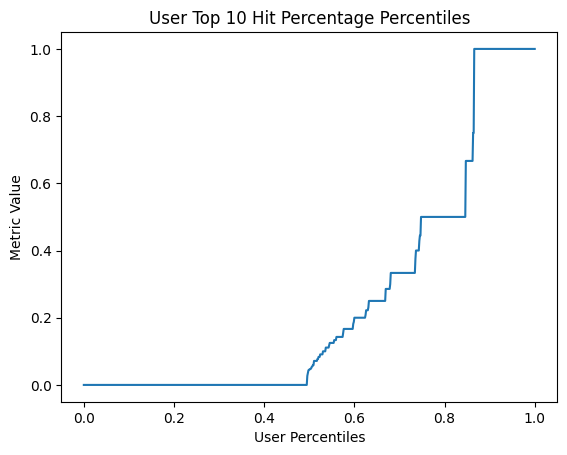

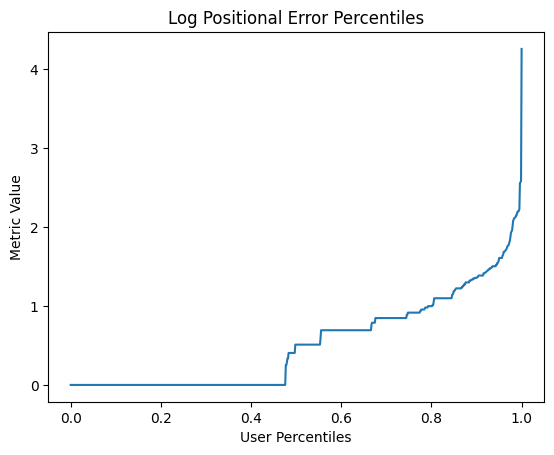

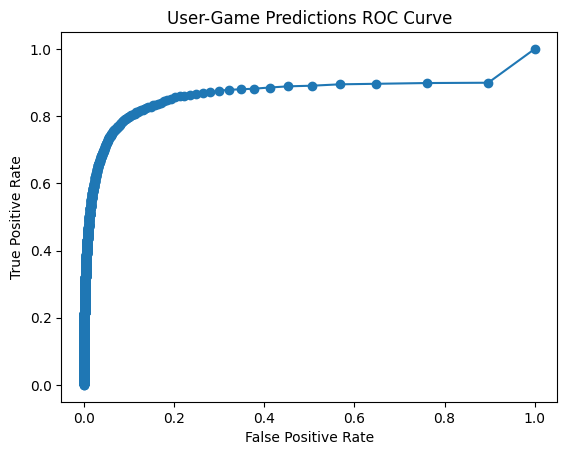

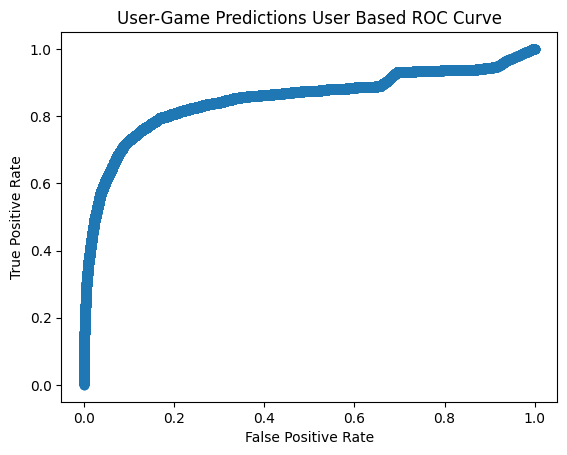

In [ ]:
evaluator.reset(common_neighbors_model)
evaluator.plot_top_N_hit_percentage_percentiles(10)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_hit_percentage(10)
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(common_neighbors_model.name())
pprint(evaluator.metrics)
print()

collaborative_filtering
{'auc_roc': 0.5000297105341239,
 'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'mean_positional_error': 1.1926335071383343,
 'roc_figure': <Figure size 640x480 with 1 Axes>,
 'score_absolute_error_mean': 3.22813087828743e+16,
 'score_absolute_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'top_10_hit_percentage': 0.0778567199526347,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_based_auc_roc': 0.5111153590859249,
 'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}



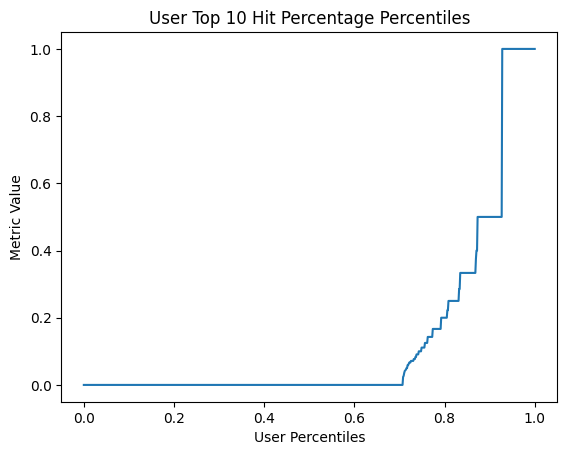

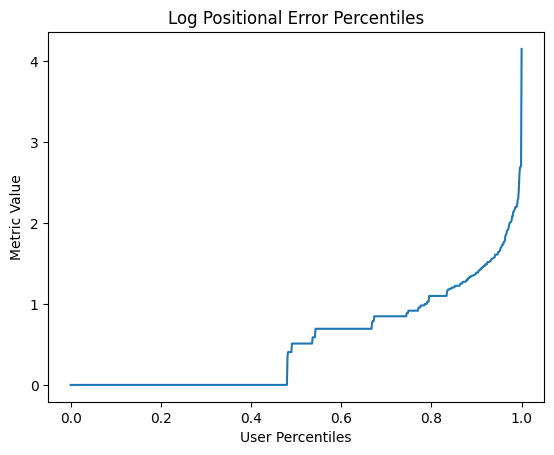

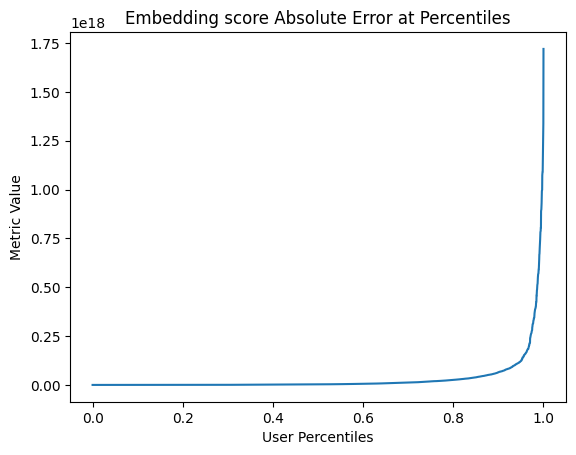

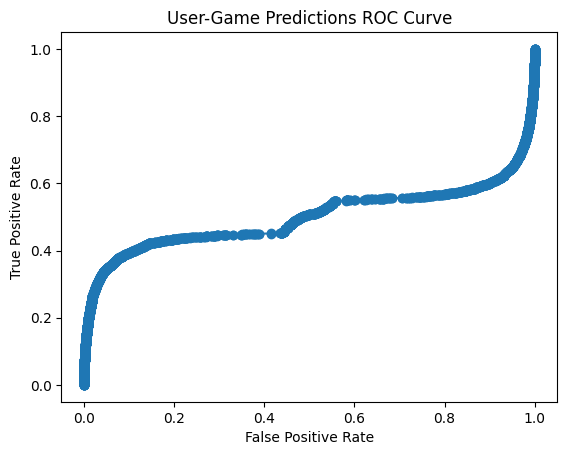

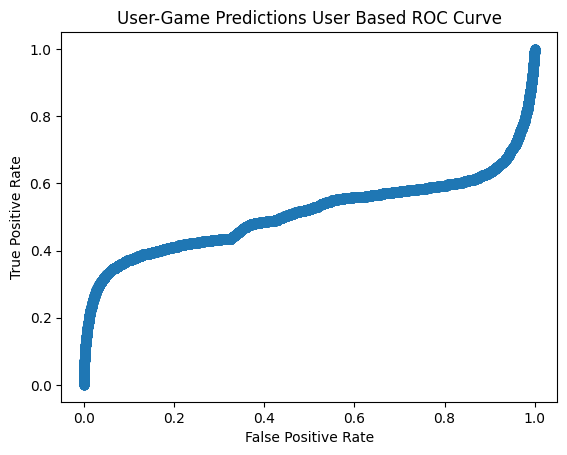

In [ ]:
evaluator.reset(collaborative_filtering_model)
evaluator.plot_top_N_hit_percentage_percentiles(10)
evaluator.plot_log_user_percentile_positional_error()
evaluator.compute_mean_positional_error()
evaluator.compute_top_N_hit_percentage(10)
evaluator.compute_embedding_mean_absolute_error('score')
evaluator.plot_embedding_percentile_absolute_error('score')
evaluator.plot_roc_curve()
evaluator.compute_auc_roc()
evaluator.plot_user_based_roc_curve()
evaluator.compute_user_based_auc_roc()
print(collaborative_filtering_model.name())
pprint(evaluator.metrics)
print()

In [ ]:
# Linear 0.0 - 1.0. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.2624548488519872,
#  'mean_positional_accuracy': 1.1080676423367724,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.08306404503260398,
#  'top_10_hit_percentage': 0.04706927175843695,
#  'user_based_auc_roc': 0.4626781951301976,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Linear 0.1 - 1.0. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.32906387344533383,
#  'mean_positional_accuracy': 1.0727349547901788,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.0802670835179918,
#  'top_10_hit_percentage': 0.04322084073416223,
#  'user_based_auc_roc': 0.6265025651588524,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Linear 0.5 - 1.0. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.850272260168788,
#  'mean_positional_accuracy': 1.0490319100614587,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.10745767997735144,
#  'top_10_hit_percentage': 0.037892243931320305,
#  'user_based_auc_roc': 0.8279208608592943,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Linear 0.95 - 1.0. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.903324845267819,
#  'mean_positional_accuracy': 1.0638567654236313,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 1.2526411825975077,
#  'top_10_hit_percentage': 0.04914150384843102,
#  'user_based_auc_roc': 0.8305757694127186,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# 1.0. reg: 0.00. Score 1.0. No game embeddings. # TODO Rerun
# collaborative_filtering
# {'auc_roc': 0.902385302058243,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 1.3088103963141593,
#  'top_10_hit_percentage': 0.04381290704558911,
#  'user_based_auc_roc': 0.8291321442286401,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Gaussian 1.0 mean 1.0 std. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.8815005640014273,
#  'mean_positional_accuracy': 1.0036334930040225,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.37051943308128826,
#  'top_10_hit_percentage': 0.03404381290704559,
#  'user_based_auc_roc': 0.7674414486770883,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Gaussian 0.0 mean 1.0 std. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.2648346493267875,
#  'mean_positional_accuracy': 1.0950698894022208,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.4231719883763354,
#  'top_10_hit_percentage': 0.04884547069271759,
#  'user_based_auc_roc': 0.3282898566440835,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Percentile. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.8033583633976665,
#  'mean_positional_accuracy': 0.9674672715591154,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.17603159761097514,
#  'top_10_hit_percentage': 0.03937240970988751,
#  'user_based_auc_roc': 0.747005230182369,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Percentile then Gaussian 1.0 mean 1.0 std. reg: 0.00. Score tot playtime. No game embeddings.
# collaborative_filtering
# {'auc_roc': 0.7508464981685113,
#  'mean_positional_accuracy': 0.9363920463531673,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.6886733048427978,
#  'top_10_hit_percentage': 0.040556542332741266,
#  'user_based_auc_roc': 0.6445371152979551,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Gaussian 1.0 mean 1.0 std. reg: 0.00. Score tot playtime. All game embeddings.
# collaborative_filtering
# {'auc_roc': 0.7189158149862522,
#  'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'mean_positional_error': 1.0713242791012825,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.4960014347658399,
#  'score_absolute_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'top_10_hit_percentage': 0.03966844286560095,
#  'user_based_auc_roc': 0.6339820340887812,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}

# Gaussian 1.0 mean 1.0 std. reg: 0.00. Score tot playtime. genres game embedding.
# collaborative_filtering
# {'auc_roc': 0.8064466034847956,
#  'log_positional_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'mean_positional_error': 1.01832276751585,
#  'roc_figure': <Figure size 640x480 with 1 Axes>,
#  'score_absolute_error_mean': 0.4076801479905383,
#  'score_absolute_error_percentiles_figure': <Figure size 640x480 with 1 Axes>,
#  'top_10_hit_percentage': 0.040556542332741266,
#  'user_based_auc_roc': 0.6677880066470216,
#  'user_based_roc_figure': <Figure size 640x480 with 1 Axes>}